<a href="https://colab.research.google.com/github/markzaldivar/MAT422/blob/main/IndependentVariablesandRandomSamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Independent Variables and Random Samples

## Joint Probability Distributions
The probability mass function (pmf) of a single random variable $X$ can be extended to two variables $X, Y$ for describing how much probability mass is placed on each possible pair of values $(x, y)$.

Let $X$ and $Y$ be two discrete random variable's defined on the sample space $S$ of an experiment. The joint probability mass function $p(x, y)$ is defined for each pair of numbers $(x, y)$ by
$$
p(x, y)=P(X=x \text { and } Y=y)
$$

It must be the case that $ p(x, y) \geq 0$  and $\sum_x \sum_y p(x, y) = 1$




The marginal probability mass function of $X$, denoted by $p_{X}(x)$, is given by
$$
p_{X}(x)=\sum_{y: p(x, y)>0} p(x, y) \quad \text { for each possible value } x
$$
Similarly, the marginal probability mass function of $Y$ is
$$
p_{Y}(y)=\sum_{x: p(x, y)>0} p(x, y) \quad \text { for each possible value } y
$$

The same ideas can be applied to continuous variables. Let $X$ and $Y$ be continuous random variables. A joint probability density function $f(x, y)$ for these two variables is a function satisfying $f(x, y) \geq 0$ and $\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) d x d y=1$. Then for any two-dimensional set $A$
$$
P[(X, Y) \in A]=\iint_{A} f(x, y) d x d y
$$

The marginal probability density functions of $X$ and $Y$, denoted by $f_{X}(x)$ and $f_{Y}(y)$, respectively, are given by
$$
\begin{aligned}
&f_{X}(x)=\int_{-\infty}^{\infty} f(x, y) d y \text { for }-\infty<x<\infty \\
&f_{Y}(y)=\int_{-\infty}^{\infty} f(x, y) d x \text { for }-\infty<y<\infty
\end{aligned}
$$

### Independent Random Variables
Two random variables $X$ and $Y$ are said to be independent if for every pair of $x$ and $y$ values
$$p(x, y)=p_{X}(x) \cdot p_{Y}(y) \quad$$ when $X$ and $Y$ are discrete
or
$$
f(x, y)=f_{X}(x) \cdot f_{Y}(y) \quad
$$

when $X$ and $Y$ are continuous

If the above is not satisfied for all $(x, y)$, then $X$ and $Y$ are said to be dependent.

If $X_{1}, X_{2}, \ldots, X_{n}$ are all discrete random variables, the joint $\mathrm{pmf}$ of the variables is the function
$$
p\left(x_{1}, x_{2}, \ldots, x_{n}\right)=P\left(X_{1}=x_{1}, X_{2}=x_{2}, \ldots, X_{n}=x_{n}\right)
$$
If the variables are continuous, the joint pdf of $X_{1}, \ldots, X_{n}$ is the function $f\left(x_{1}, x_{2}, \ldots, x_{n}\right)$ such that for any $n$ intervals $\left[a_{1}, b_{1}\right], \ldots,\left[a_{n}, b_{n}\right]$
$$
P\left(a_{1} \leq X_{1} \leq b_{1}, \ldots, a_{n} \leq X_{n} \leq b_{n}\right)=\int_{a_{1}}^{b_{1}} \ldots \int_{a_{n}}^{b_{n}} f\left(x_{1}, \ldots, x_{n}\right) d x_{n} \ldots d x_{1}
$$

The random variables $X_{1}, X_{2}, \ldots, X_{n}$ are said to be independent if for every- subset $X_{i_{1}}, X_{i_{2}}, \ldots, X_{i_{k}}$ of the variables (each pair, each triple, and so on), the joint pmf or pdf of the subset is equal to the product of the marginal pmf's or pdf's.

We apply these concepts in Python in the case of two continous random variables below.

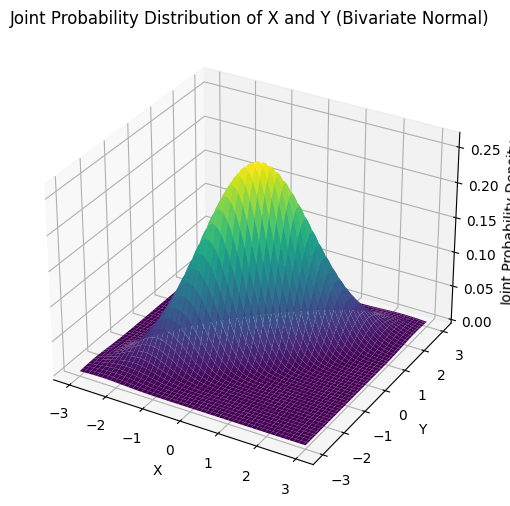

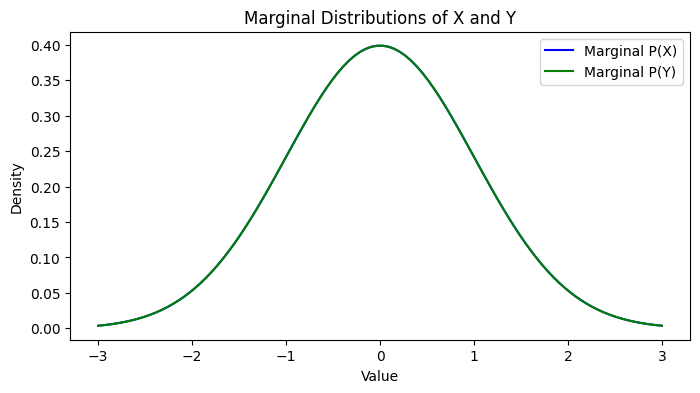

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define mean and covariance matrix for the bivariate normal distribution
mean = [0, 0]  # Means of X and Y
cov = [[1, 0.8], [0.8, 1]]  # Covariance matrix (shows correlation between X and Y)

# Create grid of points (x, y) over which to evaluate the joint PDF
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Define the bivariate normal distribution
rv = multivariate_normal(mean, cov)

# Compute the joint probability density function over the grid
Z = rv.pdf(pos)

# Plot the joint probability distribution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Joint Probability Density')
plt.title("Joint Probability Distribution of X and Y (Bivariate Normal)")
plt.show()

# Marginal distributions are derived from the joint distribution.
# For instance, marginal of X: integrate over Y.

marginal_X = np.trapz(Z, y, axis=1)
marginal_Y = np.trapz(Z, x, axis=0)

plt.figure(figsize=(8, 4))
plt.plot(x, marginal_X, label='Marginal P(X)', color='blue')
plt.plot(y, marginal_Y, label='Marginal P(Y)', color='green')
plt.title("Marginal Distributions of X and Y")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


## Correlation and Dependence
Let $X$ and $Y$ be jointly distributed random variable's with $\operatorname{pmf} p(x, y)$ or pdf $f(x, y)$ according to whether the variables are discrete or continuous. The covariance between two random variable's $X$ and $Y$ is
$$
\begin{aligned}
\operatorname{Cov}(X, Y) &=E\left[\left(X-\mu_{X}\right)\left(Y-\mu_{Y}\right)\right] \\
&= \begin{cases}\sum_{x} \sum_{y}\left(x-\mu_{X}\right)\left(y-\mu_{Y}\right) p(x, y), & X, Y \text { discrete } \\
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty}\left(x-\mu_{X}\right)\left(y-\mu_{Y}\right) f(x, y) d x d y, & X, Y \text { continuous }\end{cases}
\end{aligned}
$$
Covariance is a measure of the joint variability of two random variables.

The correlation coefficient is a measure of linear correlation between two variables or sets of data.
The correlation coefficient of $X$ and $Y$, denoted by $\operatorname{Corr}(X, Y), \rho_{X, Y}$, or just $\rho$, is defined by
$$
\rho_{X, Y}=\frac{\operatorname{Cov}(X, Y)}{\sigma_{X} \cdot \sigma_{Y}}
$$
Proposition 2.3.10 Correlation coefficients have the following properties:
1. If $X$ and $Y$ are independent, then $\rho=0$, but $\rho=0$ does not imply independence.
2. $|\rho| \leq 1, \rho=1$ or $-1$ if $Y=a X+b$ for some numbers $a$ and $b$ with $a \neq 0$

Below we directly calculate the correlation coefficient of a sample, commonly referred to as the Pearson correlation coefficient, using functions from Python's scipy.stats module.

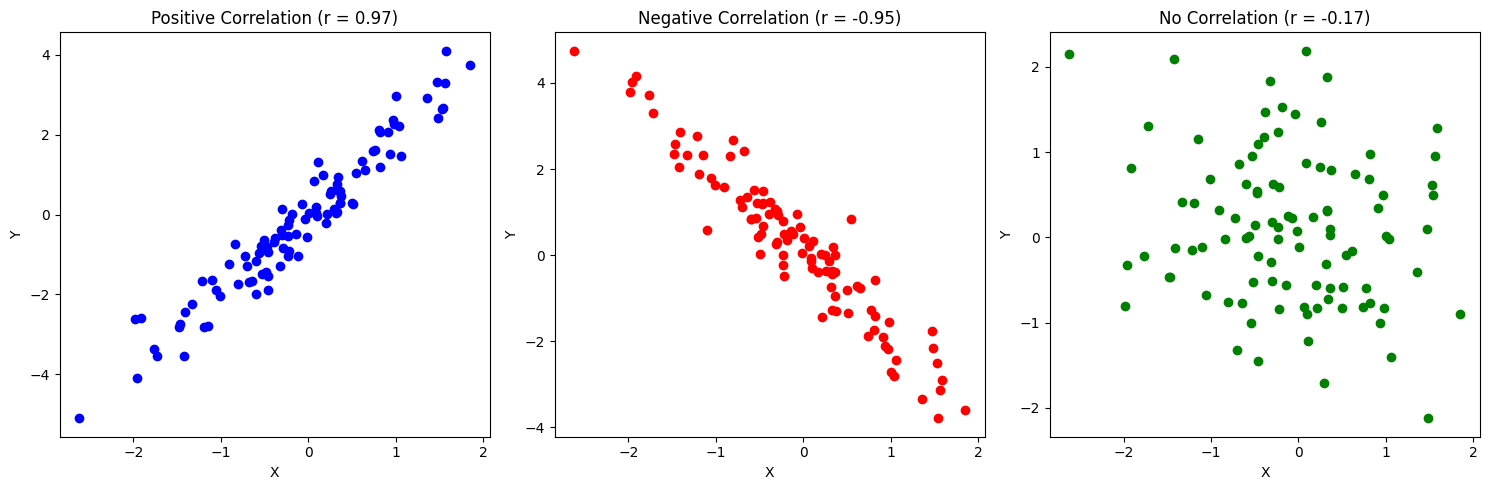

Positive Correlation Coefficient (r): 0.97
Negative Correlation Coefficient (r): -0.95
No Correlation Coefficient (r): -0.17


In [3]:

from scipy.stats import pearsonr

# Generate random data for two variables X and Y
np.random.seed(42)

# Create 100 random values for X
X = np.random.normal(0, 1, 100)

# Create Y as a linear function of X with some noise (positive correlation)
Y_pos = 2 * X + np.random.normal(0, 0.5, 100)

# Create Y as a negative correlation with X
Y_neg = -2 * X + np.random.normal(0, 0.5, 100)

# Create Y with no correlation to X
Y_no_corr = np.random.normal(0, 1, 100)

# Calculate Pearson correlation coefficients
corr_pos, _ = pearsonr(X, Y_pos)
corr_neg, _ = pearsonr(X, Y_neg)
corr_no_corr, _ = pearsonr(X, Y_no_corr)

# Plot scatter plots and display correlation coefficients
plt.figure(figsize=(15, 5))

# Positive correlation
plt.subplot(1, 3, 1)
plt.scatter(X, Y_pos, color='blue')
plt.title(f'Positive Correlation (r = {corr_pos:.2f})')
plt.xlabel('X')
plt.ylabel('Y')

# Negative correlation
plt.subplot(1, 3, 2)
plt.scatter(X, Y_neg, color='red')
plt.title(f'Negative Correlation (r = {corr_neg:.2f})')
plt.xlabel('X')
plt.ylabel('Y')

# No correlation
plt.subplot(1, 3, 3)
plt.scatter(X, Y_no_corr, color='green')
plt.title(f'No Correlation (r = {corr_no_corr:.2f})')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

# Print correlation coefficients
print(f"Positive Correlation Coefficient (r): {corr_pos:.2f}")
print(f"Negative Correlation Coefficient (r): {corr_neg:.2f}")
print(f"No Correlation Coefficient (r): {corr_no_corr:.2f}")


## Random Samples
A simple random sample is a randomly selected subset of a population and often is used in practice.

The random variable's $X_{1}, X_{2}, \ldots, X_{n}$ are said to form a (simple) random sample of size $n$ if
1. The $X_{i}$ 's are independent random variable's.
2. Every $X_{i}$ has the same probability distribution.



Let $X_1, X_2, \dots, X_n$ be a random sample from a distribution with mean $\mu$ and standard deviation $\sigma$. Then:

1. $E(\bar{X}) = \mu$, where $\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i$.

2. $V(\bar{X}) = \sigma^2_{\bar{X}} = \frac{\sigma^2}{n}$, and $\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$.

In addition, with $T_0 = X_1 + \dots + X_n$ (the sample total),

- $E(T_0) = n\mu$,
- $V(T_0) = n\sigma^2$,
- and $\sigma_{T_0} = \sqrt{n} \sigma$.


### The Central Limit Theorem
The central limit theorem (CLT) indicates that the properly normalized sum of independent random variables tends toward a normal distribution even if the original variables themselves are not normally distributed.

More formally, if $X_{1}, X_{2}, \ldots, X_{n}$ is a random sample from a distribution with mean $\mu$ and variance $\sigma^{2}$, then if $n$ is sufficiently large, $\bar{X}$ has approximately a normal distribution with $\mu_{X}=\mu$ and $\sigma_{\bar{X}}^{2}=\sigma^{2} / n$, and $T_{o}$ also has approximately a normal distribution with $\mu_{T_{o}}=n \mu, \sigma_{T_{o}}^{2}=n \sigma^{2} .$ The larger the value of $n$, the better the approximation.

Below we demonstrate the CLT in Python using samples of various sizes from a population with a non-normal distribution. The plots show that the distribution of the sample mean approach a normal distribution as the sample size increases.

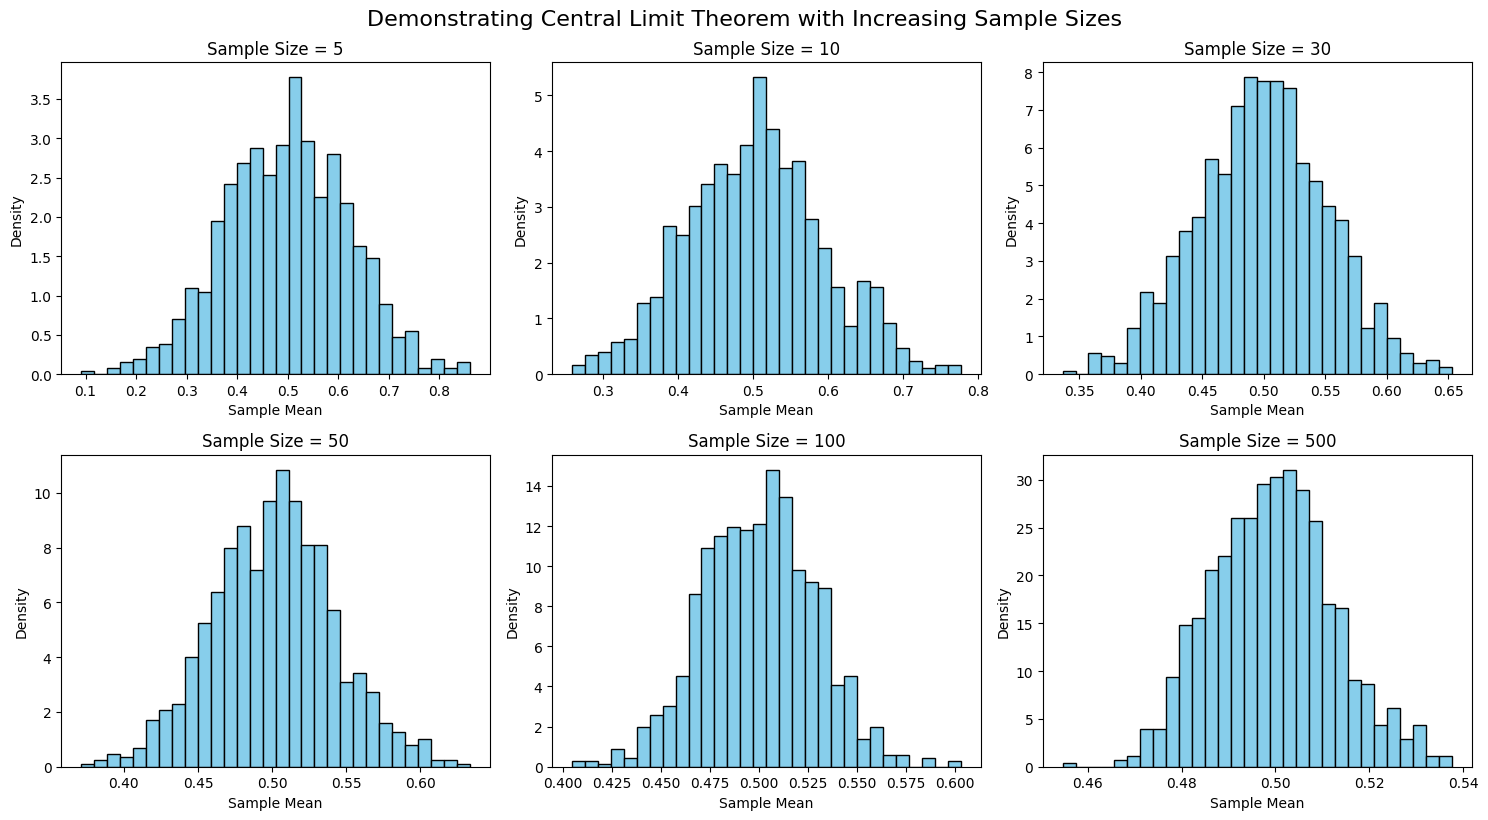

In [4]:


# Set the population distribution (Uniform distribution as an example)
population = np.random.uniform(0, 1, 100000)  # Large population from a uniform distribution

# Function to plot histograms of sample means
def plot_clt(sample_sizes, num_samples=1000):
    plt.figure(figsize=(15, 8))

    for i, sample_size in enumerate(sample_sizes):
        # Take many samples of the given size and calculate their means
        sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]

        # Plot the histogram of sample means
        plt.subplot(2, len(sample_sizes)//2, i + 1)
        plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black', density=True)
        plt.title(f'Sample Size = {sample_size}')
        plt.xlabel('Sample Mean')
        plt.ylabel('Density')

    plt.tight_layout()
    plt.suptitle("Demonstrating Central Limit Theorem with Increasing Sample Sizes", fontsize=16, y=1.02)
    plt.show()

# Demonstrate CLT for different sample sizes
sample_sizes = [5, 10, 30, 50, 100, 500]
plot_clt(sample_sizes)
